# Import the dependencies

In [88]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [89]:
import warnings
warnings.filterwarnings('ignore')
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math as math
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [90]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

# Function for conducing DMD
* Take the Singular Value Decomposition of X
$$X\approx U\Sigma V^{*}$$

* Truncate to low rank r

* Compute $\tilde{A}$

$$\tilde{A}=U^{*}X^{'}V\Sigma^{-1}$$

* Compute the eigendecomposition of $\tilde{A}$

$$\tilde{A}W=W\Lambda$$

* Reconstruct the eigendecomposition of $A$ from $W$ and $\Lambda$

$$\Phi=X^{'}V\Sigma^{-1}W$$

In [91]:
def dmd(X,Xprime,r):
    U,S,V = np.linalg.svd(X,full_matrices=False,compute_uv=True)
    S=np.diag(S)
    V=V.T
    U=U[:,:r]
    S=S[:r,:r]
    V=V[:,:r]
    Atilde = U.T.conj().dot(Xprime).dot(V).dot(np.linalg.inv(S))
    eigs, W = np.linalg.eig(Atilde)
    eigs=np.diag(eigs)
    Phi = Xprime.dot(V).dot(np.linalg.inv(S)).dot(W)
    return Phi,eigs, W

# Plotting the eigen modes

In [92]:
def plot_all_cylinder(s,r):
    theta = np.linspace(0,1,100)
    theta = theta * 2*22.0/7.
    x = 49.0+25.0*np.sin(theta)
    y = 99.0+25.0*np.cos(theta)
    counter = 0
    plt.figure(figsize = (20,50))
    for i in range (0,r,2):
        counter = counter +1
        plt.subplot(r,2,counter)
        plt.imshow(np.real(s[:,:,i].T),cmap='hsv')
        plt.fill(x,y)
        counter = counter + 1
        plt.subplot(r,2,counter)
        plt.imshow(np.imag(s[:,:,i].T),cmap='hsv')
        plt.fill(x,y)
    plt.show()

In [96]:
def plot_all_cylinder_vort(s,r):
    theta = np.linspace(0,1,100)
    theta = theta * 2*22.0/7.
    x = 49.0+25.0*np.sin(theta)
    y = 99.0+25.0*np.cos(theta)
    counter = 0
    plt.figure(figsize = (20,50))
    for i in range (0,r):
        counter = counter +1
        plt.subplot(r,2,counter)
        plt.imshow(s[:,:,counter-1].T,cmap='hsv')
        plt.fill(x,y)
        counter = counter + 1
        plt.subplot(r,2,counter)
        plt.imshow(s[:,:,counter].T,cmap='hsv')
        plt.fill(x,y)
    plt.show()

# Read the CFD results snapshots

In [97]:
contents=sio.loadmat('./CYLINDER_ALL.mat')
nx,ny,m,n = contents['nx'],contents['ny'],contents['m'],contents['n']
VORTALL = contents['VORTALL']
X  = VORTALL[:,0:150]
X2 = VORTALL[:,1:151]
m, n = np.asscalar(m), np.asscalar(n)
nx, ny = np.asscalar(nx), np.asscalar(ny) 

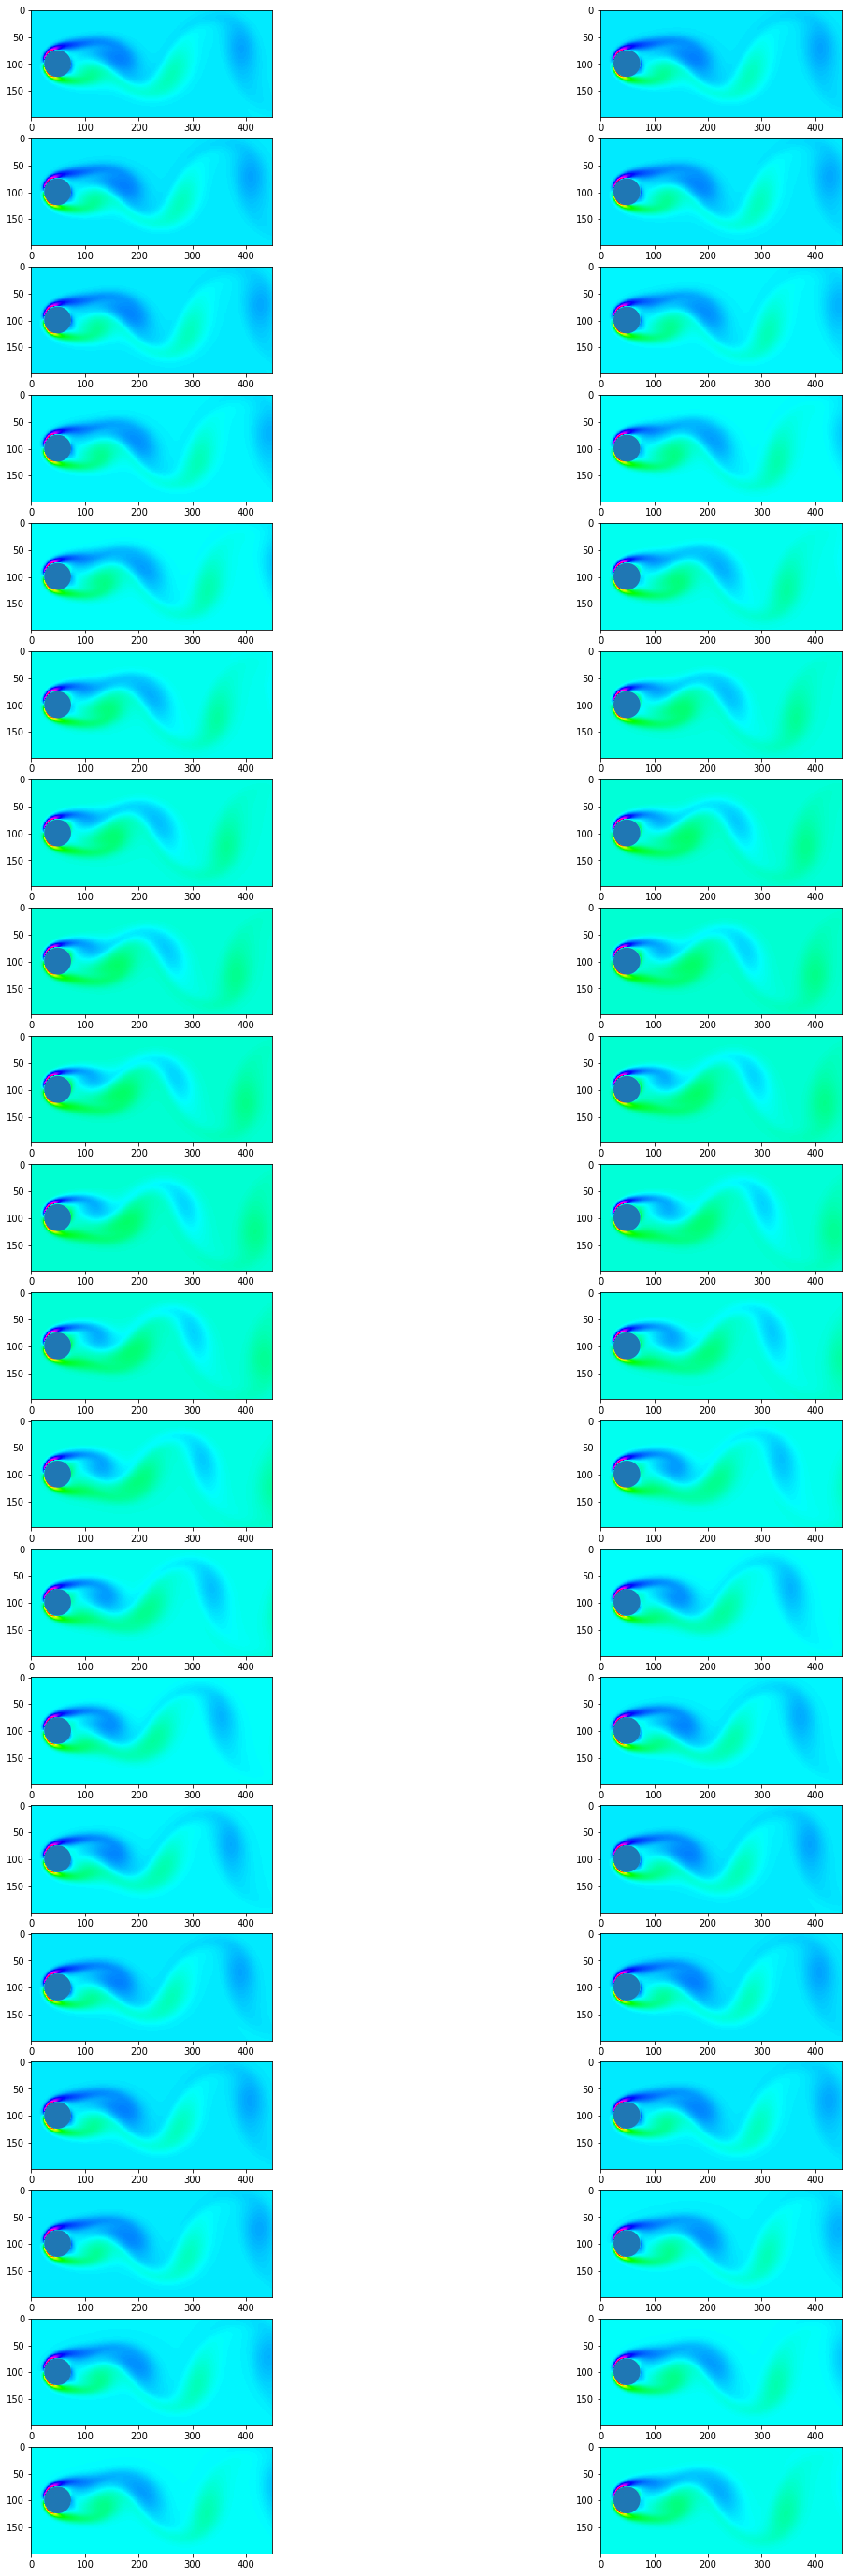

In [98]:
Xorg = np.reshape(X,(ny,nx,150))
plot_all_cylinder_vort(Xorg,20)

# We want to retain the 20 modes only

In [ ]:
r =20  

# Conduct Dynamic Mode Decomposition

In [9]:
# Phi is the eigen modes, eigs is the eigenvalues and W is the eigenvector
Phi, eigs, W = dmd(X,X2,r)

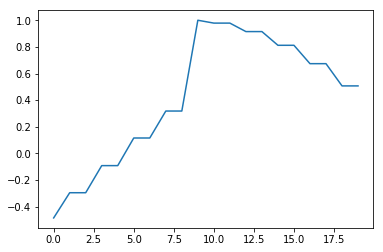

In [14]:
#Confirm if the modes are sorted
plt.plot(np.diag(np.real(eigs)))

# Sort the eigen modes in the decreasing content of the energy

In [16]:
temp_eigs = np.diag(eigs)
idx = temp_eigs.argsort()[::-1]
temp_eigs = temp_eigs[idx]
eigs = np.diag(temp_eigs)
Phi = Phi[:,idx]

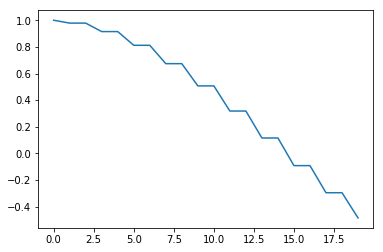

In [17]:
plt.plot(np.diag(np.real(eigs)))

# Plot the eigen modes

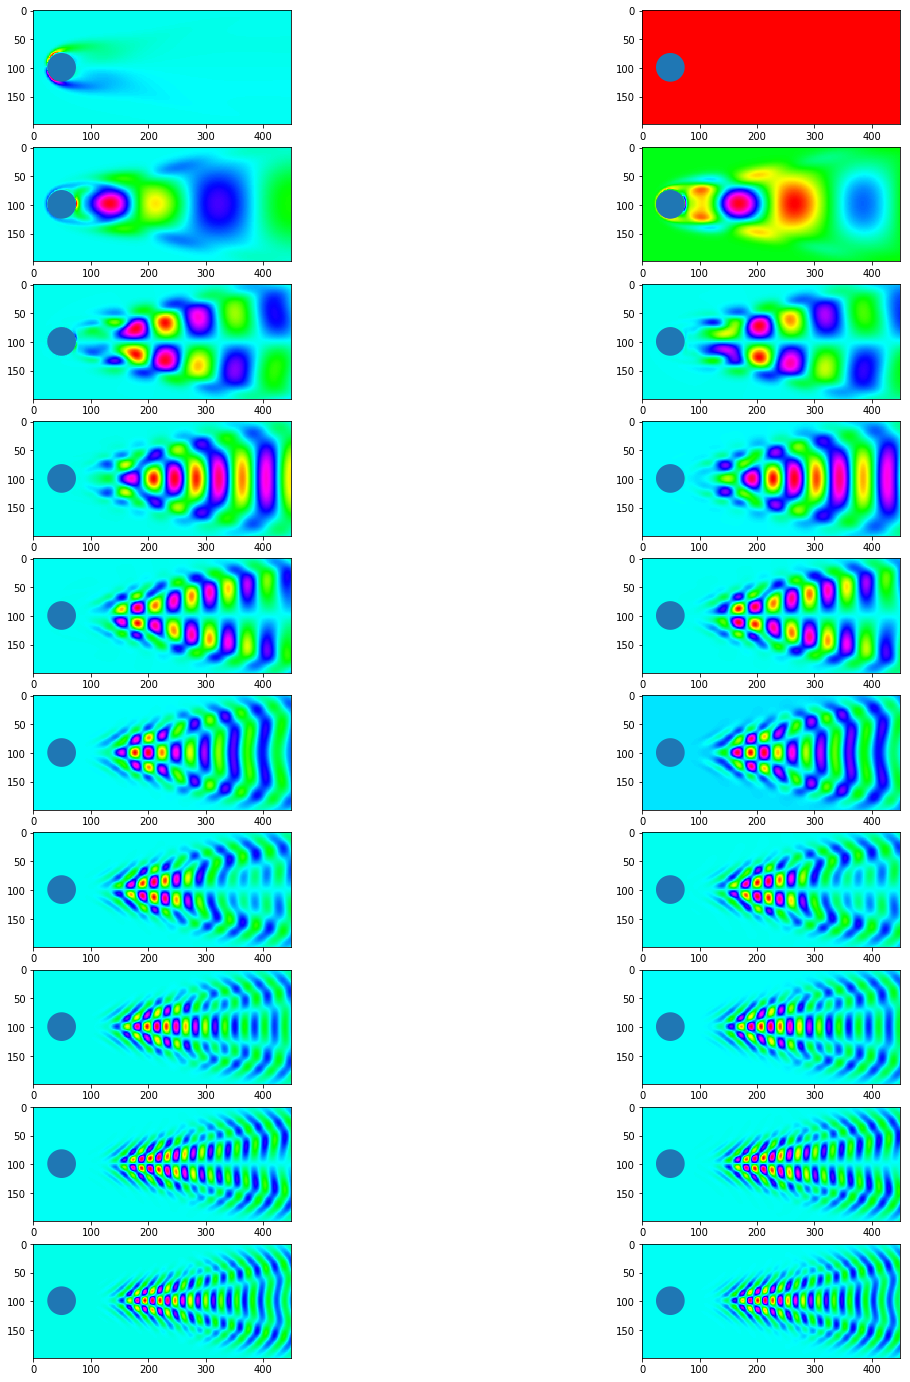

In [19]:
Phi = np.reshape(Phi,(ny,nx,r))
plot_all_cylinder(Phi,20)

In [20]:
def plot_cylinder(s):
    plt.figure()
    plt.imshow(s,cmap='hsv',hold='on')
    theta = np.linspace(0,1,100)
    theta = theta * 2*22.0/7.
    x = 49.0+25.0*np.sin(theta)
    y = 99.0+25.0*np.cos(theta)
    plt.fill(x,y)
    plt.show()

In [30]:

X.shape

(89351, 150)